E:/IDRID_seg_dataset/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/IDRiD_01_EX.tif


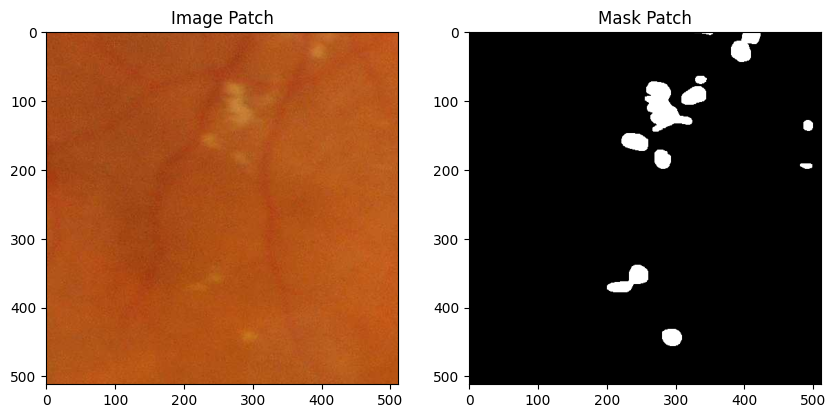

In [34]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def display_patch(image_path, mask_path, patch_size):
    # Read the image and mask using cv2
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    print(mask_path)
    

    # Choose a random patch location within the valid range
    height, width, _ = image.shape
    patch_x = random.randint(0, width - patch_size)
    patch_y = random.randint(0, height - patch_size)

    # Crop the patch from both the image and the mask
    image_patch = image[patch_y:patch_y + patch_size, patch_x:patch_x + patch_size, :]
    mask_patch = mask[patch_y:patch_y + patch_size, patch_x:patch_x + patch_size]

    # Display the image and mask side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(cv2.cvtColor(image_patch, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image Patch')

    axes[1].imshow(mask_patch, cmap='gray')
    axes[1].set_title('Mask Patch')

    plt.show()

# Specify the path to the image and mask folders
image_folder_path = "E:/IDRID_seg_dataset/A. Segmentation/1. Original Images/a. Training Set/"
mask_folder_path = "E:/IDRID_seg_dataset/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/"

# Get a list of image and mask files in the folders
image_files = os.listdir(image_folder_path)
mask_files = os.listdir(mask_folder_path)

# Assuming the file names are the same in both folders
for file_name in image_files:
    # Construct the full paths for the image and mask
    mask_file_name = file_name.split(".")[0] + "_EX.tif"
    image_path = os.path.join(image_folder_path, file_name)
    mask_path = os.path.join(mask_folder_path,mask_file_name)

    # Specify the patch size (you can change this to your desired size)
    patch_size = 512

    # Display the image and mask patches side by side
    display_patch(image_path, mask_path, patch_size)
    break



In [35]:

import os
import cv2
import numpy as np
from tqdm import tqdm 

def generate_patches(image_path, mask_path, patch_size, overlap, save_path_image, save_path_mask):
    # Read the image and mask using cv2
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the save directories exist
    os.makedirs(save_path_image, exist_ok=True)
    os.makedirs(save_path_mask, exist_ok=True)

    # Get image dimensions
    height, width, _ = image.shape

    # Calculate the stride based on overlap
    stride = int(patch_size * (1 - overlap))

    # Generate patches with overlap
    for y in range(0, height - patch_size + 1, stride):
        for x in range(0, width - patch_size + 1, stride):
            # Extract patches
            image_patch = image[y:y + patch_size, x:x + patch_size, :]
            mask_patch = mask[y:y + patch_size, x:x + patch_size]

            # Check if the mask contains at least one positive pixel
            if np.any(mask_patch > 0):
                # Save the patches
                patch_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_{y}_{x}.png"
                cv2.imwrite(os.path.join(save_path_image, patch_name), image_patch)
                cv2.imwrite(os.path.join(save_path_mask, patch_name), mask_patch)

# Specify the path to the image and mask folders
image_folder_path = "E:/IDRID_seg_dataset/A. Segmentation/1. Original Images/a. Training Set/"
mask_folder_path = "E:/IDRID_seg_dataset/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates/"
save_path_image = "E:/IDRID_seg_dataset/HE_patches/image_patches_512/"
save_path_mask = "E:/IDRID_seg_dataset/HE_patches/mask_patches_512/"

# Get a list of image and mask files in the folders
image_files = os.listdir(image_folder_path)
mask_files = os.listdir(mask_folder_path)

# Assuming the file names are the same in both folders
for file_name in tqdm(image_files):
    # Construct the full paths for the image and mask
    mask_file_name = file_name.split(".")[0] + "_EX.tif"
    image_path = os.path.join(image_folder_path, file_name)
    mask_path = os.path.join(mask_folder_path, mask_file_name)

    # Specify the patch size and overlap
    patch_size = 512
    overlap = 0.2

    # Generate and save patches
    generate_patches(image_path, mask_path, patch_size, overlap, save_path_image, save_path_mask)


100%|██████████| 54/54 [00:41<00:00,  1.30it/s]
